In [1]:
import os
import pandas as pd

In [2]:
def obtener_archivos_csv(directorio_raiz):
    archivos_csv = []

    # Recorrer todos los paises
    for pais in os.listdir(directorio_raiz):
        path_pais = os.path.join(directorio_raiz, pais)

        if os.path.isdir(path_pais):
            
            for equipo in os.listdir(path_pais):
                path_equipo = os.path.join(path_pais, equipo)

                if os.path.isdir(path_equipo):

                    for archivo in os.listdir(path_equipo):
                        if archivo.endswith('.csv'):
                            archivos_csv.append(os.path.join(path_equipo, archivo))
                            
    return archivos_csv


In [3]:
directorio_raiz = "./database/xvalue"
lista_archivos_csv = obtener_archivos_csv(directorio_raiz)

In [4]:
def importar_archivos(archivos):
    dfs = []
    
    for archivo in archivos:
        try:
            df = pd.read_csv(archivo)
            
            df['Equipo'] = archivo.split(os.path.sep)[-2]  # Tomar el penúltimo elemento del path como nombre del equipo
            df['Año'] = archivo.split(os.path.sep)[-1].split('_')[0]  # Tomar el año del nombre del archivo
            
            dfs.append(df)
        
        except pd.errors.EmptyDataError:
            print(f"Ignorando el archivo {archivo} por estar vacío o no tener contenido válido.")
            continue  # Pasa al siguiente archivo
    
    df_final = pd.concat(dfs, ignore_index=True)
    return df_final

df = importar_archivos(lista_archivos_csv)


Ignorando el archivo D:/Universidad/IA_Football/xvalue\argentina\arsenal\2018_match_day_arsenal.csv por estar vacío o no tener contenido válido.
Ignorando el archivo D:/Universidad/IA_Football/xvalue\argentina\barracas\2017_match_day_barracas.csv por estar vacío o no tener contenido válido.
Ignorando el archivo D:/Universidad/IA_Football/xvalue\argentina\barracas\2018_match_day_barracas.csv por estar vacío o no tener contenido válido.
Ignorando el archivo D:/Universidad/IA_Football/xvalue\argentina\barracas\2019_match_day_barracas.csv por estar vacío o no tener contenido válido.
Ignorando el archivo D:/Universidad/IA_Football/xvalue\argentina\barracas\2020_match_day_barracas.csv por estar vacío o no tener contenido válido.
Ignorando el archivo D:/Universidad/IA_Football/xvalue\argentina\barracas\2021_match_day_barracas.csv por estar vacío o no tener contenido válido.
Ignorando el archivo D:/Universidad/IA_Football/xvalue\argentina\belgrano\2019_match_day_belgrano.csv por estar vacío o 

In [5]:
print(df.shape)

(33998, 75)


In [6]:
df.describe()

,Match Day,Year,Goals,xG,xG in open-play,xG from counters,xG from set pieces,Shots For,Shots On Target,Shot accuracy,...,Successful Dribbles,Successful Crosses open play,Passes/Dribbles,ppda,BDP,Def event height,Total Red Cards,Matches Played,GK long ball %,% Forward passes
count,25978.000000,33998.000000,33998.000000,33998.000000,33992.000000,33992.000000,33992.000000,33998.000000,33992.000000,33992.000000,...,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,18.664678,2019.553268,1.417289,1.075692,0.748774,0.066630,0.193889,12.833931,4.402801,35.081059,...,338.000000,86.500000,0.0,5.547583,2.438866,15.890000,3.000000,32.166667,50.000000,32.166667
std,10.726517,1.734020,1.425926,1.029477,0.744128,0.179575,0.285258,7.840173,2.450636,16.061166,...,92.121659,16.825576,0.0,6.140370,2.822215,17.409325,0.632456,4.490731,9.316652,1.722401
min,1.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,231.000000,62.000000,0.0,0.000000,-0.653131,0.000000,2.000000,23.000000,33.000000,30.000000
25%,9.000000,2018.000000,0.000000,0.188992,0.027276,0.000000,0.000000,9.000000,3.000000,25.000000,...,259.250000,75.000000,0.0,0.000000,0.467328,0.000000,3.000000,34.000000,48.750000,31.250000
50%,18.000000,2020.000000,1.000000,0.949939,0.599144,0.000000,0.076329,12.000000,4.000000,33.333300,...,341.500000,96.000000,0.0,4.922350,2.058840,15.750000,3.000000,34.000000,51.500000,32.000000
75%,28.000000,2021.000000,2.000000,1.660076,1.157323,0.000000,0.264353,16.000000,6.000000,44.444400,...,410.250000,96.750000,0.0,10.597400,3.770621,31.500000,3.000000,34.000000,55.000000,32.750000
max,46.000000,2022.000000,70.000000,53.436613,7.157870,2.258006,3.225910,540.000000,20.000000,100.000000,...,449.000000,100.000000,0.0,12.592500,6.890610,32.340000,4.000000,34.000000,60.000000,35.000000


In [7]:
print(df.nunique())


Team                178
Match Day            46
Opponent            357
Side                  2
Competition          13
                   ... 
Def event height      3
Total Red Cards       3
Matches Played        2
GK long ball %        6
% Forward passes      5
Length: 75, dtype: int64


In [8]:
missing_data = df.isnull().sum()
print(missing_data)

Team                    0
Match Day            8020
Opponent               28
Side                   28
Competition             0
                    ...  
Def event height    33992
Total Red Cards     33992
Matches Played      33992
GK long ball %      33992
% Forward passes    33992
Length: 75, dtype: int64


In [9]:
cols_to_drop = df.columns[df.isnull().sum() == 33992]
df.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
print(df.columns)

Index(['Team', 'Match Day', 'Opponent', 'Side', 'Competition', 'Year',
       'Formation', 'Opponent Formation', 'Goals', 'xG', 'xG in open-play',
       'xG from counters', 'xG from set pieces', 'Shots For',
       'Shots On Target', 'Shot accuracy', 'Goal Conversion', 'Goals Conceded',
       'xG Conceded', 'xG conceded in open-play', 'xG conceded from counters',
       'xG conceded from set pieces', 'Total Shots Conceded',
       'Shots On Target Conceded', 'Defensive event height', '% Possession',
       'Field Tilt', 'xT from passes', 'Total passes', 'Dribbles',
       'Touches opp. box', 'Through balls', 'Crosses', 'One-Twos', 'PPDA',
       'GPI', 'GPE', 'Total Fouls Won', 'Total Fouls Conceded', 'Yellow cards',
       'Red Cards', 'Points', 'Expected Points', 'Opponent Expected Points',
       'xThreat', 'xThreat from carries', 'xThreat from passes', 'Equipo',
       'Año'],
      dtype='object')


In [11]:
def modify_column_name(nombre):
    # Conversión a minúsculas y reemplazo de espacios por underscores
    nombre = nombre.lower().replace(' ', '_')
    
    cambios_especificos = {
        'xg_against': 'expected_goals_against',
        'xg': 'expected_goals',
        'xg_in_open-play':'expected_goals_in_open_play',
        'xg_from_counters':'expected_goals_from_counters',
        'xg_from_set_pieces':'expected_goals_from_set_pieces',
        'xg_conceded':'expected_goals_conceded',
        'xg_conceded_in_open-play':'expected_goals_conceded_in_open_play',
        'xg_conceded_from_counters':'expected_goals_conceded_from_counters',
        'xg_conceded_from_set_pieces':'expected_goals_conceded_from_set_pieces',
        '%_possession':'possession',
        'xt_from_passes':'expected_threat_from_passes',
        'touches_opp._box':'touches_opponent_box',
        'one-twos':'one_twos',
        'xthreat':'expected_threat',
        'xthreat_from_carries':'expected_threat_from_carries',
    }
    
    return cambios_especificos.get(nombre, nombre)

df.columns = [modify_column_name(col) for col in df.columns]

In [12]:
cols_to_drop = ['match_day', 'goal_conversion', 'points', 'expected_points', 'opponent_expected_points',
                'año', 'equipo', 'xthreat_from_passes', 'expected_threat_from_carries', 'opponent_formation',
                'gpe']
df.drop(columns=cols_to_drop, inplace=True)

In [13]:
numeric_df = df.select_dtypes(include=['number'])
negative_counts = (numeric_df < 0).sum()
print(negative_counts)

year                                        0
goals                                       0
expected_goals                              0
expected_goals_in_open_play                 0
expected_goals_from_counters                0
expected_goals_from_set_pieces              0
shots_for                                   0
shots_on_target                             0
shot_accuracy                               0
goals_conceded                              0
expected_goals_conceded                     0
expected_goals_conceded_in_open_play        0
expected_goals_conceded_from_counters       0
expected_goals_conceded_from_set_pieces     0
total_shots_conceded                        0
shots_on_target_conceded                    0
defensive_event_height                      0
possession                                  0
field_tilt                                  0
expected_threat_from_passes                22
total_passes                                0
dribbles                          

In [14]:
count_minus_one = df.apply(lambda col: (col == -1).sum() + (col == "-1").sum())
print(count_minus_one)

team                                        0
opponent                                    0
side                                        0
competition                                 0
year                                        0
formation                                  22
goals                                       0
expected_goals                              0
expected_goals_in_open_play                 0
expected_goals_from_counters                0
expected_goals_from_set_pieces              0
shots_for                                   0
shots_on_target                             0
shot_accuracy                               0
goals_conceded                              0
expected_goals_conceded                     0
expected_goals_conceded_in_open_play        0
expected_goals_conceded_from_counters       0
expected_goals_conceded_from_set_pieces     0
total_shots_conceded                        0
shots_on_target_conceded                    0
defensive_event_height            

In [15]:
df.loc[df['expected_threat_from_passes'] < 0, 'expected_threat_from_passes'] = df['expected_threat_from_passes'].median()
df.loc[df['expected_threat'] < 0, 'expected_threat'] = df['expected_threat'].median()

In [16]:
import unicodedata

def remover_tildes(input_str):
    # Verificar si el valor de entrada es una cadena
    if not isinstance(input_str, str):
        return input_str
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

df['team'] = df['team'].apply(remover_tildes)
df['opponent'] = df['opponent'].apply(remover_tildes)

In [17]:
null_team = df['team'].isnull().sum()
null_opponent = df['opponent'].isnull().sum()

print(f"Valores nulos en la columna 'team': {null_team}")
print(f"Valores nulos en la columna 'opponent': {null_opponent}")

Valores nulos en la columna 'team': 0
Valores nulos en la columna 'opponent': 28


In [18]:
df = df.dropna(subset=['team', 'opponent'])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

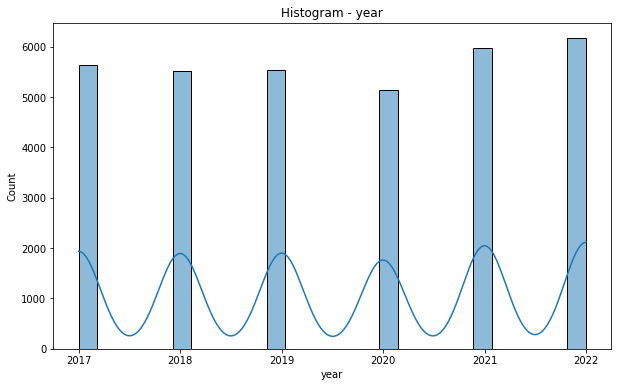

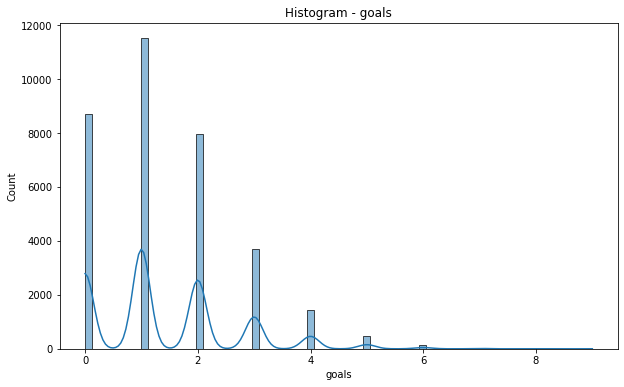

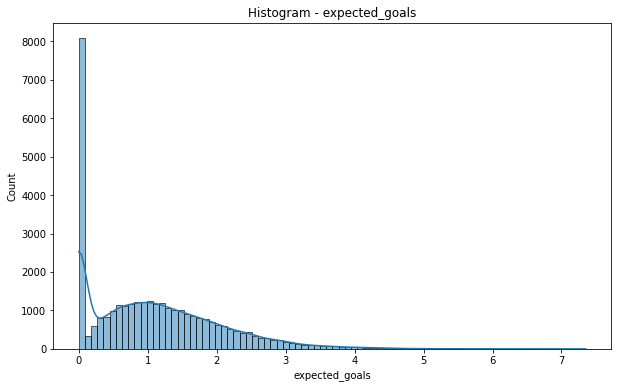

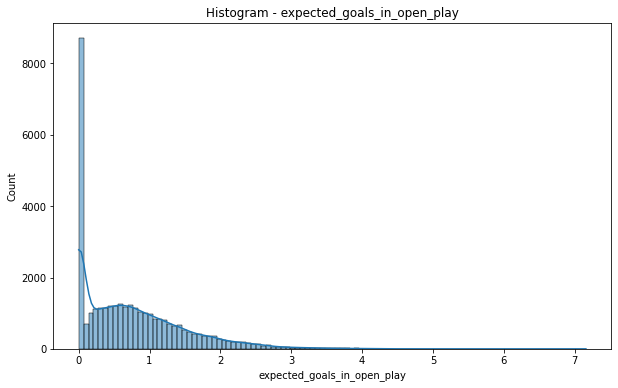

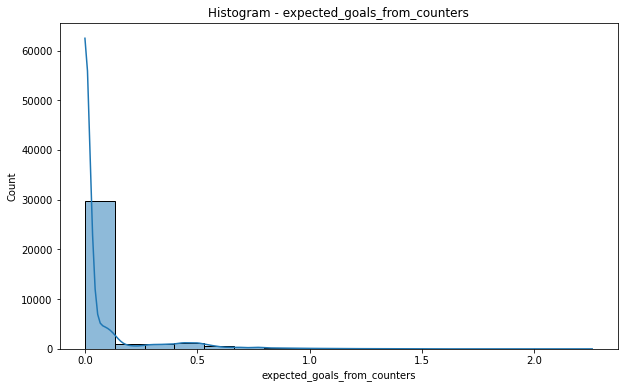

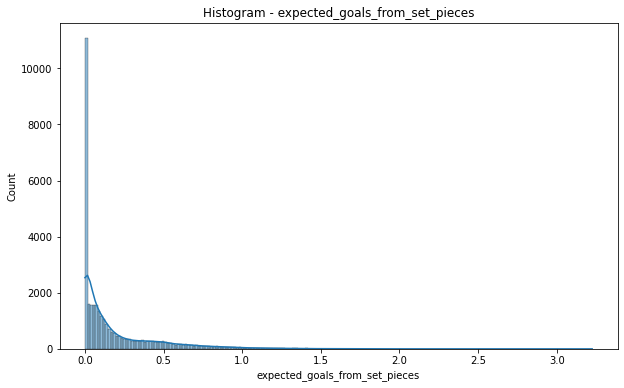

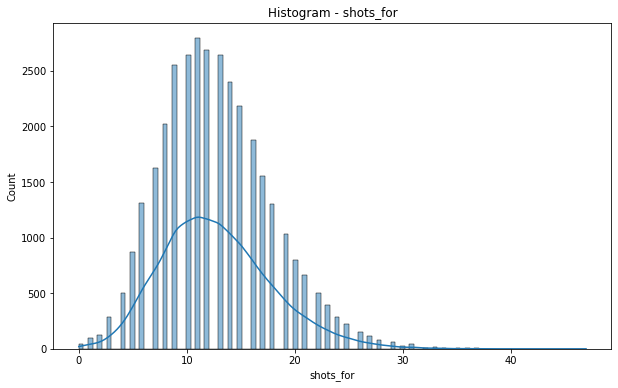

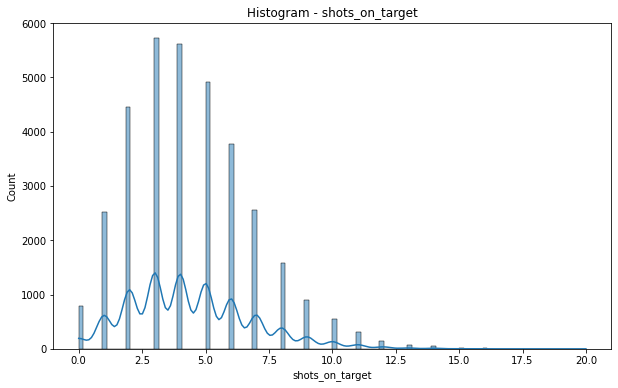

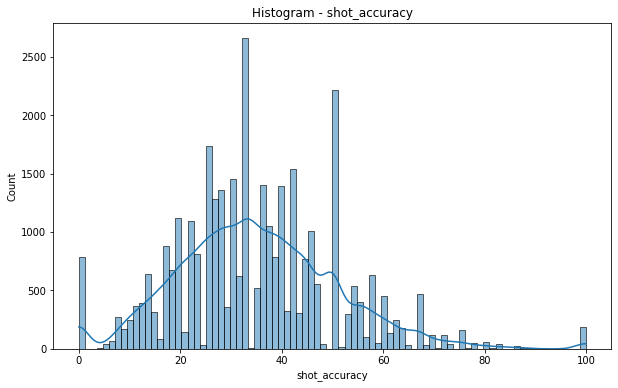

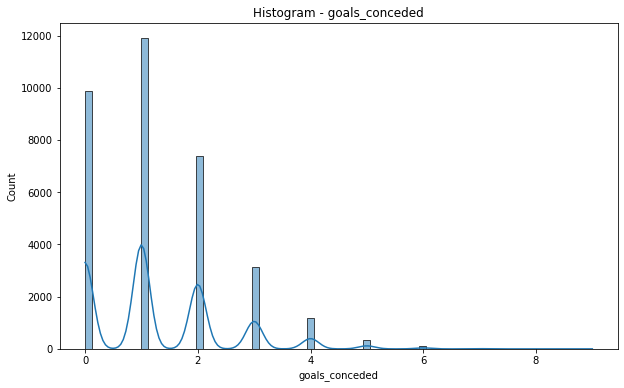

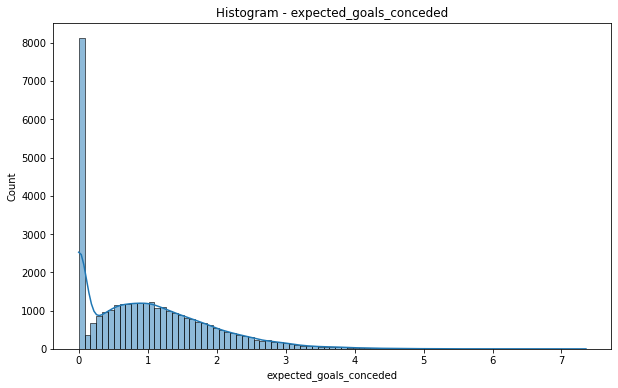

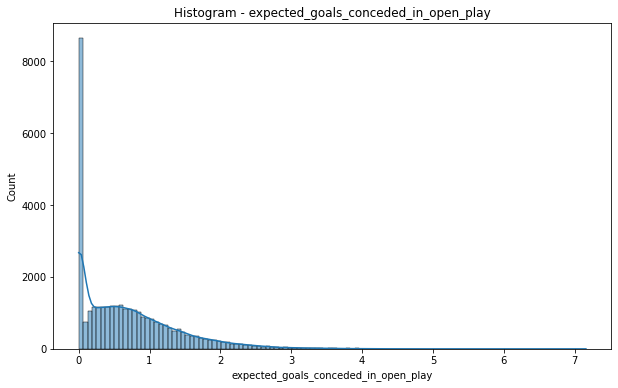

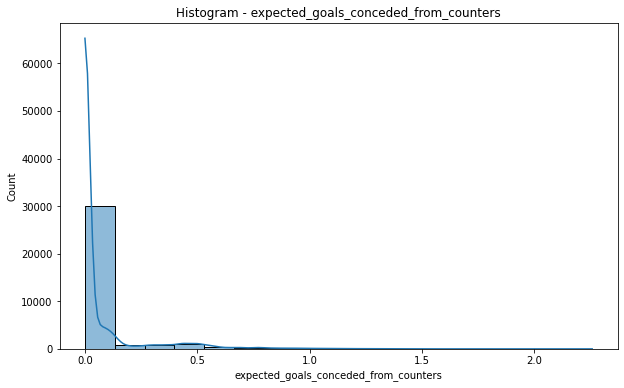

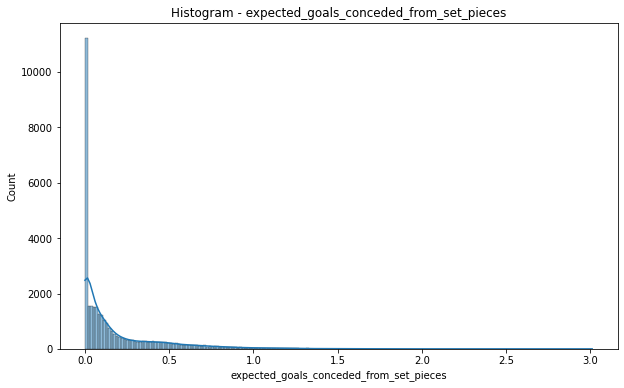

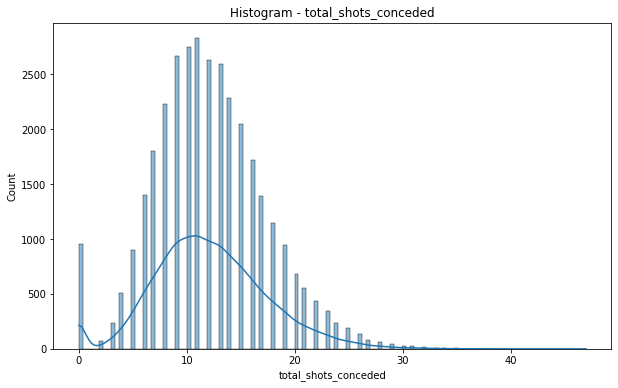

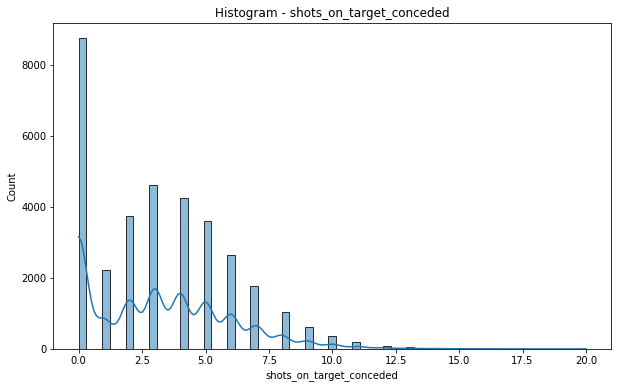

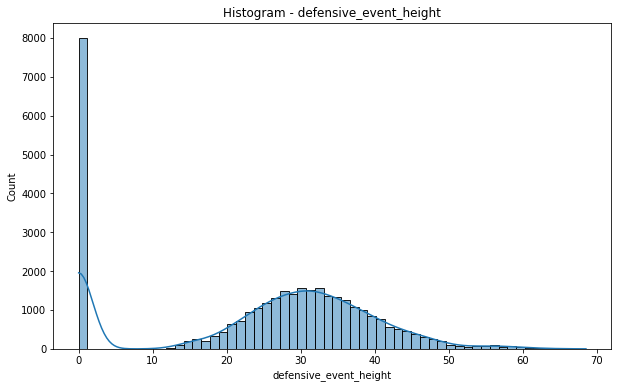

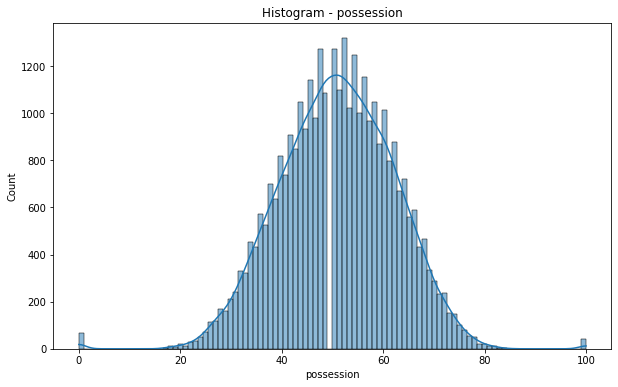

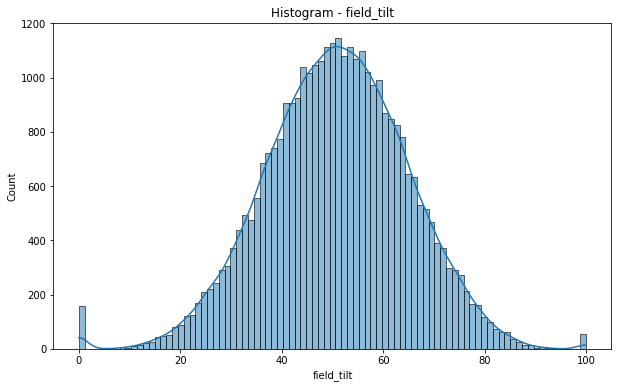

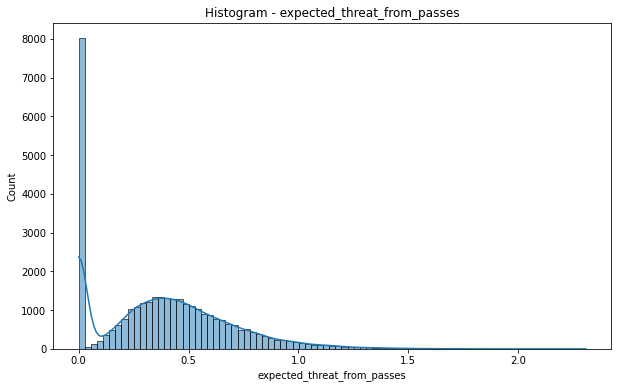

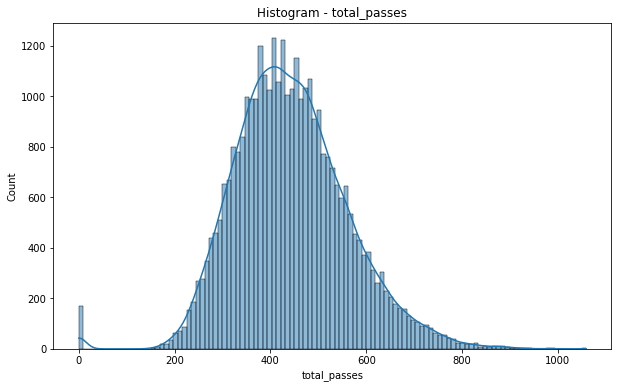

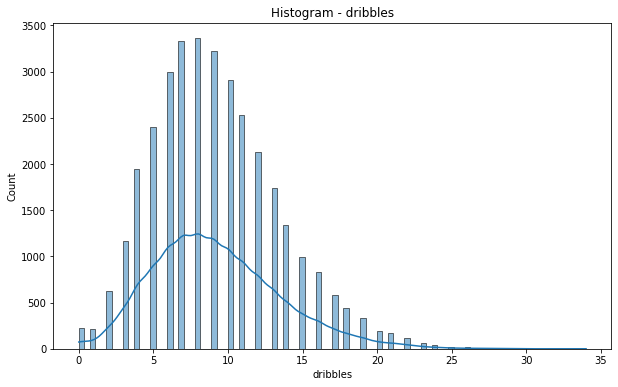

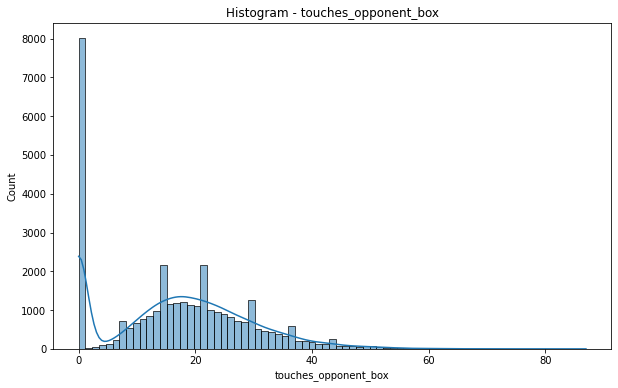

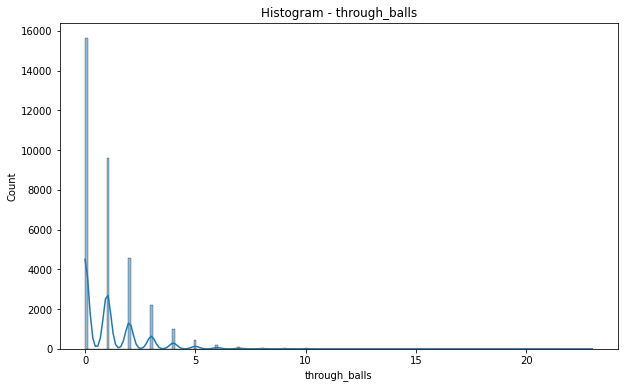

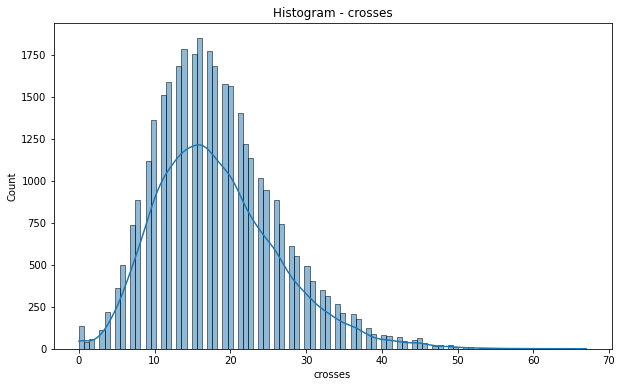

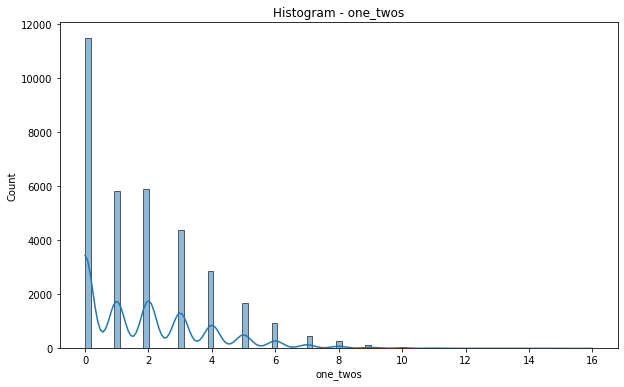

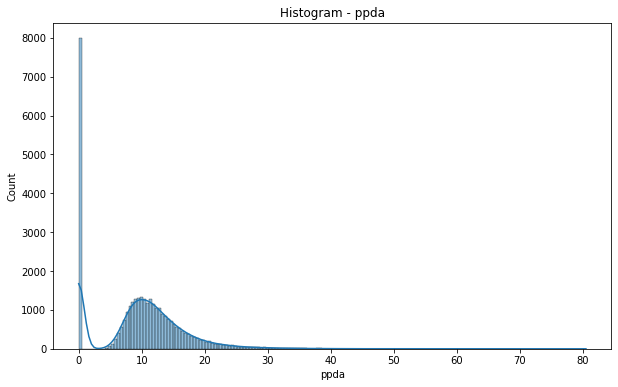

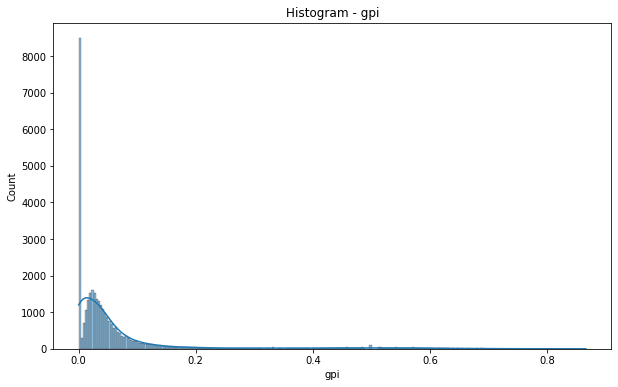

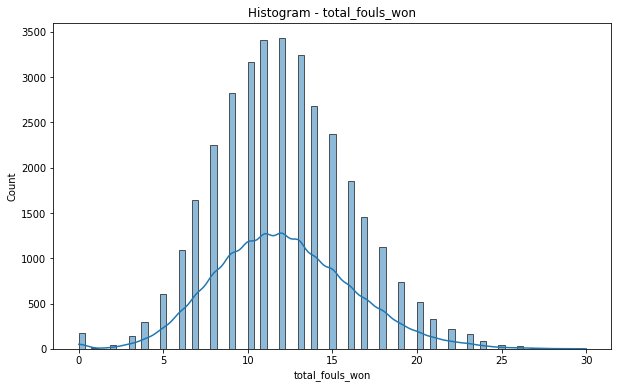

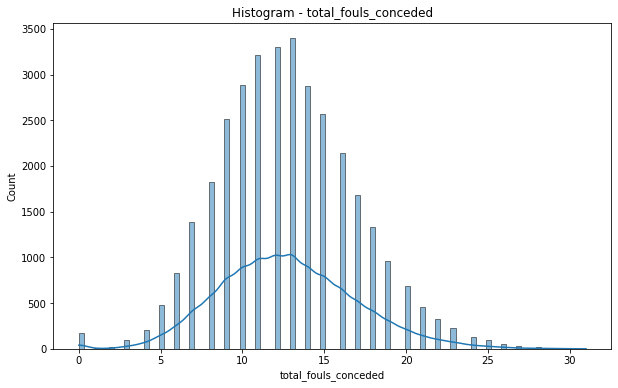

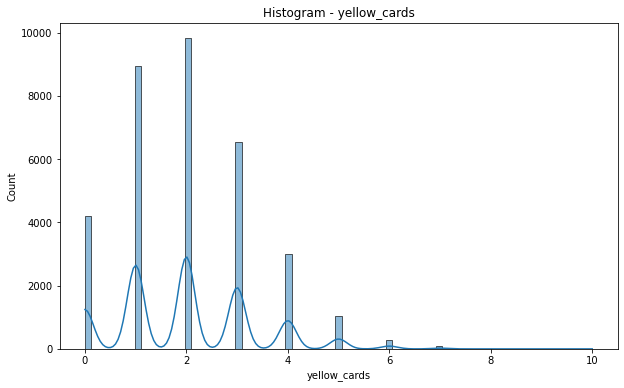

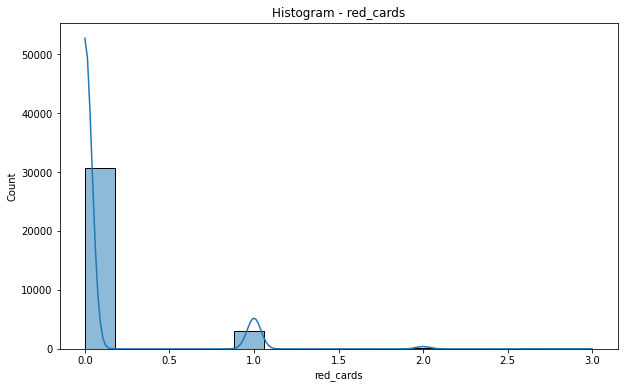

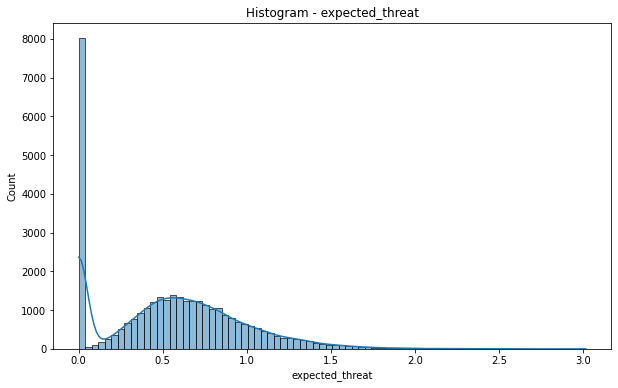

In [23]:
for column in df.columns:
    try:
        if df[column].dtype != 'object':
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column], kde=True)
            plt.title(f'Histogram - {column}')
            plt.show()
    except Exception as e:
        print(f"Error con la columna {column}: {e}")

In [18]:
unique_competitions = df["competition"].unique()

print(unique_competitions)

['Liga Profesional Argentina' 'Brazilian Serie A' 'Premier League'
 'Championship' 'Ligue 2' 'Ligue 1' 'Bundesliga' '2.Bundesliga' 'Serie A'
 'Serie B' 'Segunda division' 'La Liga' 'US Major League Soccer']


In [19]:
remove_competitions = ['Championship', 'Ligue 2', '2.Bundesliga', 'Serie B', 'Segunda division']
df = df[~df['competition'].isin(remove_competitions)]

In [64]:
for competition in unique_competitions:
    print(f"Equipos en la competencia {competition}:")
    equipos = df[df['competition'] == competition]['team'].unique()
    for equipo in equipos:
        print(f" - {equipo}")
    print("\n") 

Equipos en la competencia Liga Profesional Argentina:
 - Argentinos Juniors
 - Arsenal de Sarandi
 - Banfield
 - Barracas Central
 - Belgrano
 - Boca Juniors
 - Central Cordoba (Santiago del Estero)
 - Colon Santa Fe
 - Defensa y Justicia
 - Estudiantes de La Plata
 - Gimnasia La Plata
 - Godoy Cruz
 - Huracan
 - Independiente
 - Lanus
 - Newell's Old Boys
 - Platense
 - Racing Club
 - River Plate
 - Rosario Central
 - San Lorenzo
 - Sarmiento
 - Talleres de Cordoba
 - Tigre
 - Atletico Tucuman
 - Union Santa Fe
 - Velez Sarsfield


Equipos en la competencia Brazilian Serie A:
 - America Mineiro
 - Botafogo
 - Red Bull Bragantino
 - Corinthians
 - Coritiba
 - Cuiaba
 - Flamengo
 - Fluminense
 - Fortaleza EC
 - Goias
 - Gremio
 - Internacional
 - Atletico Mineiro
 - Palmeiras
 - Athletico Paranaense
 - Santos
 - Sao Paulo
 - Vasco da Gama


Equipos en la competencia Premier League:
 - Arsenal
 - Aston Villa
 - Bournemouth
 - Brentford
 - Brighton and Hove Albion
 - Burnley
 - Chelsea
 -

In [20]:
def remove_outliers(df, column):
    # Calcula el IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # límites inferior y superior
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df = df.reset_index(drop=True)
    
    return df

columns_to_process = [
    'goals', 'expected_goals', 'expected_goals_in_open_play', 'shots_for', 'goals_conceded', 
    'total_shots_conceded', 'touches_opponent_box', 'through_balls', 'crosses',
    'one_twos', 'ppda', 'gpi', 'total_fouls_won', 'total_fouls_conceded',
    'yellow_cards', 'expected_threat','expected_threat_from_passes'
]

for column in columns_to_process:
    df = remove_outliers(df, column)


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
print(df.shape)

(27015, 38)


In [24]:
df.to_csv("./final_data/xvalue.csv")